In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ccdata = pd.read_csv('BankChurners.csv')
ccdata.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [3]:
#run once
ccdata.drop("CLIENTNUM",axis=1,inplace=True)
ccdata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace=True)
ccdata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)

In [4]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [5]:
def objdata(dataset):
    for col in dataset:
        if dataset[col].dtypes=='object':
            print(f'{col}: unique values:{dataset[col].unique()}, dtype:{dataset[col].dtype}, count={dataset[col].count()}')
            
def othdata(dataset):
    for col in dataset:
        if dataset[col].dtypes!='object':
            print(f'{col}: no. of unique values: {len(dataset[col].unique())}, dtype:{dataset[col].dtype}, count={dataset[col].count()}')

In [6]:
objdata(ccdata)

Attrition_Flag: unique values:['Existing Customer' 'Attrited Customer'], dtype:object, count=10127
Gender: unique values:['M' 'F'], dtype:object, count=10127
Education_Level: unique values:['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate'], dtype:object, count=10127
Marital_Status: unique values:['Married' 'Single' 'Unknown' 'Divorced'], dtype:object, count=10127
Income_Category: unique values:['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'], dtype:object, count=10127
Card_Category: unique values:['Blue' 'Gold' 'Silver' 'Platinum'], dtype:object, count=10127


In [7]:
plotdata=ccdata[ccdata['Attrition_Flag']=='Attrited Customer']

Graduate         487
High School      306
Unknown          256
Uneducated       237
College          154
Doctorate         95
Post-Graduate     92
Name: Education_Level, dtype: int64


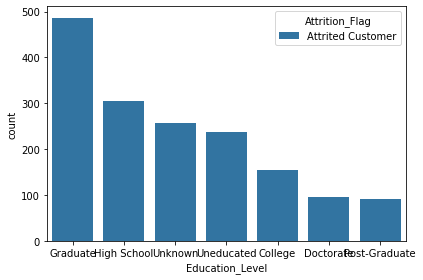

In [8]:
print(ccdata['Education_Level'][ccdata['Attrition_Flag'] == 'Attrited Customer'].value_counts())
sns.countplot(x='Education_Level',data=plotdata,hue='Attrition_Flag',order=plotdata['Education_Level'].value_counts().index)
plt.tight_layout()

Married     709
Single      668
Unknown     129
Divorced    121
Name: Marital_Status, dtype: int64


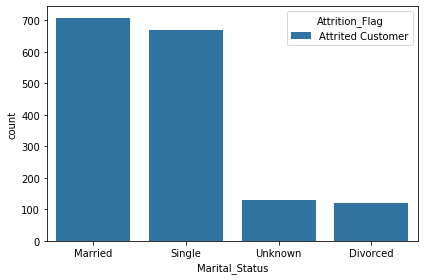

In [9]:
print(ccdata['Marital_Status'][ccdata['Attrition_Flag'] == 'Attrited Customer'].value_counts())
sns.countplot(x='Marital_Status',data=plotdata,hue='Attrition_Flag',order=plotdata['Marital_Status'].value_counts().index)
plt.tight_layout()

Less than $40K    612
$40K - $60K       271
$80K - $120K      242
$60K - $80K       189
Unknown           187
$120K +           126
Name: Income_Category, dtype: int64


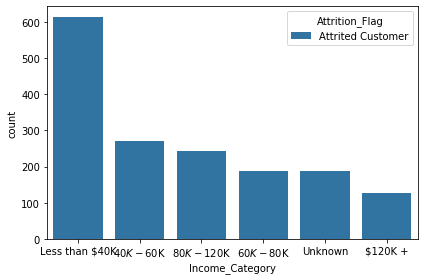

In [10]:
print(ccdata['Income_Category'][ccdata['Attrition_Flag'] == 'Attrited Customer'].value_counts())
sns.countplot(x='Income_Category',data=plotdata,hue='Attrition_Flag',order=plotdata['Income_Category'].value_counts().index)
plt.tight_layout()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


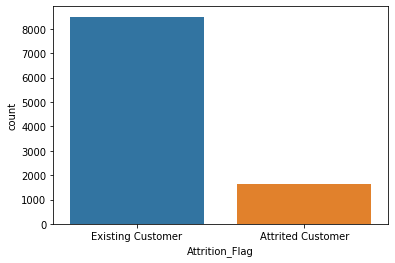

In [11]:
print(ccdata['Attrition_Flag'].value_counts())
sns.countplot(x='Attrition_Flag',data=ccdata)

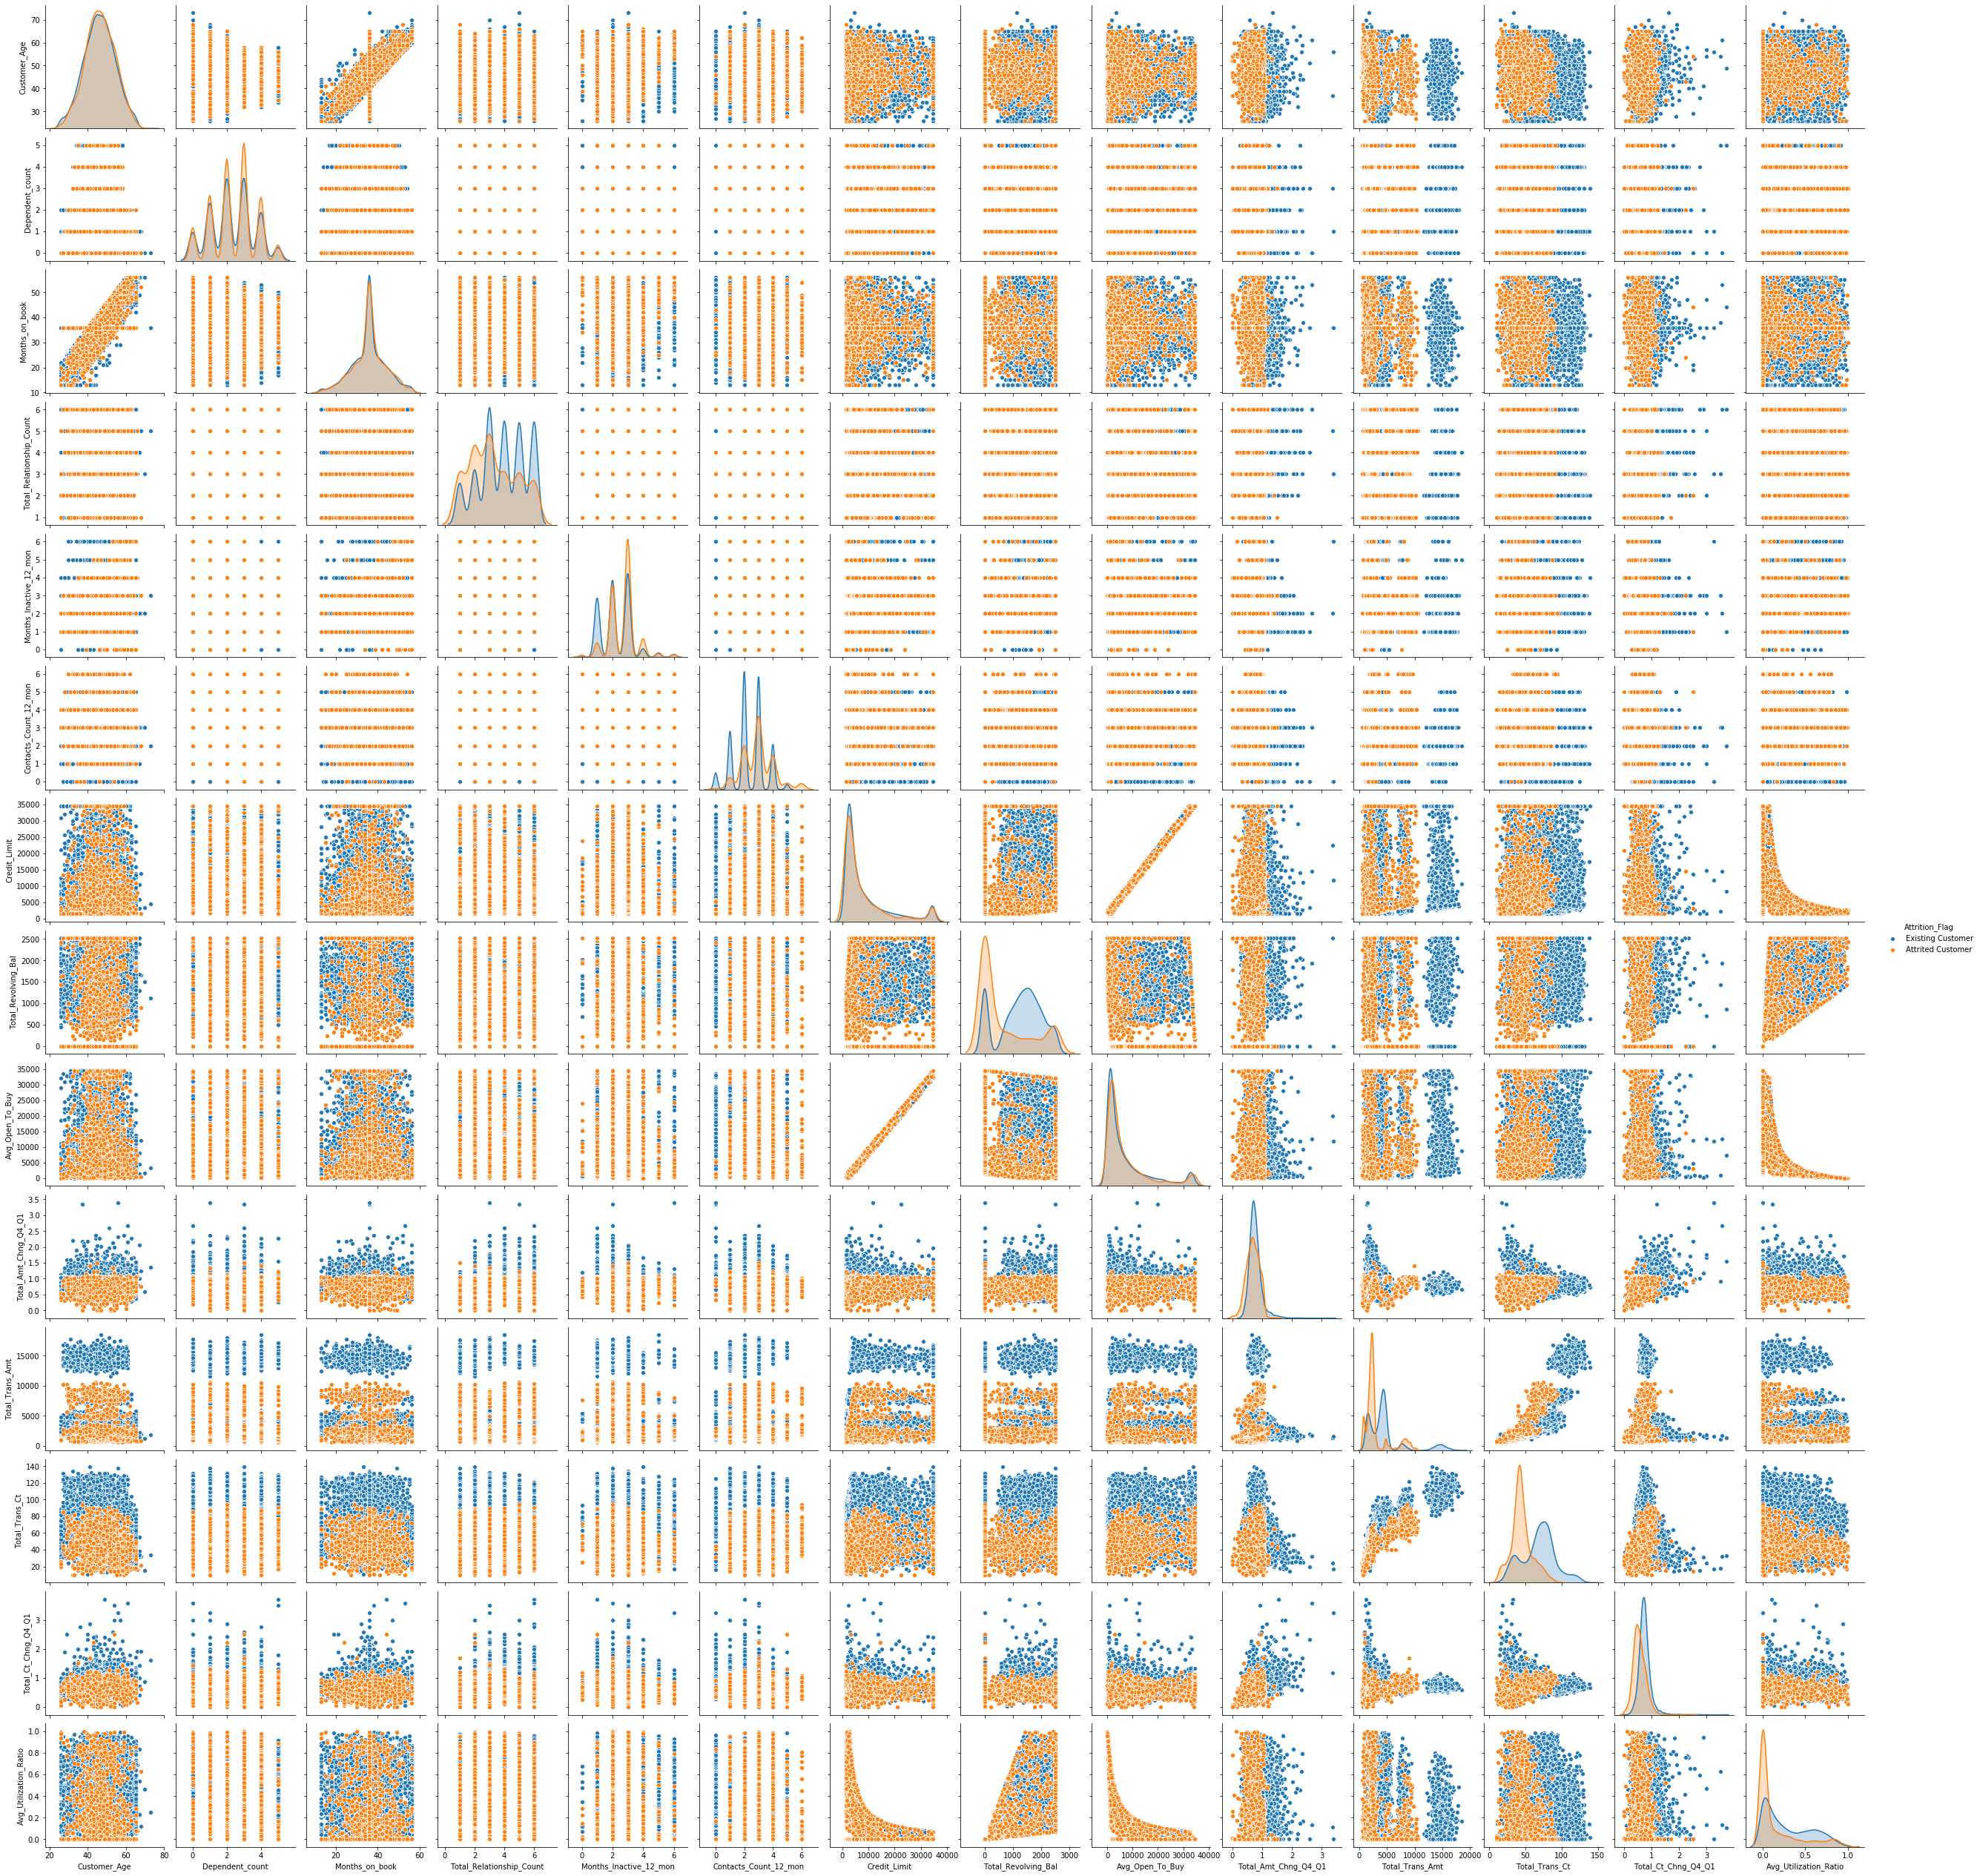

In [12]:
sns.pairplot(ccdata, hue='Attrition_Flag')

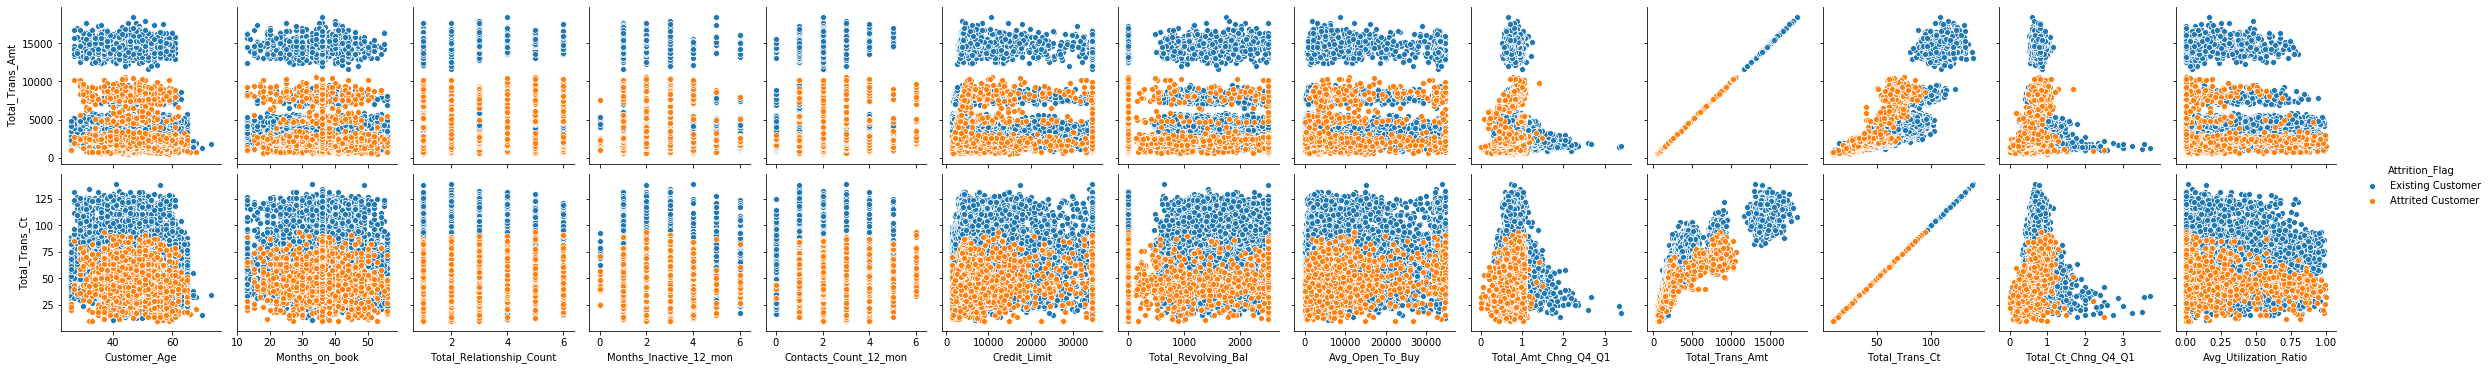

In [24]:
sns.pairplot(ccdata, hue='Attrition_Flag',x_vars=['Customer_Age','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'],y_vars=['Total_Trans_Amt','Total_Trans_Ct'])

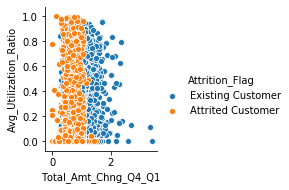

In [14]:
sns.pairplot(x_vars=['Total_Amt_Chng_Q4_Q1'],y_vars=['Avg_Utilization_Ratio'],data=ccdata,hue='Attrition_Flag')

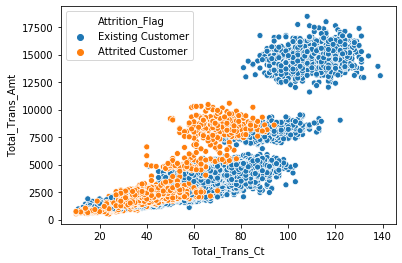

In [15]:
sns.scatterplot(x='Total_Trans_Ct',y='Total_Trans_Amt',data=ccdata,hue='Attrition_Flag')
#both are highly correlated to explaining attrition of customers

In [16]:
ccdata['Total_Trans_Amt'][(ccdata['Attrition_Flag'] == 'Attrited Customer')].max()

10583

Blue        1519
Silver        82
Gold          21
Platinum       5
Name: Card_Category, dtype: int64


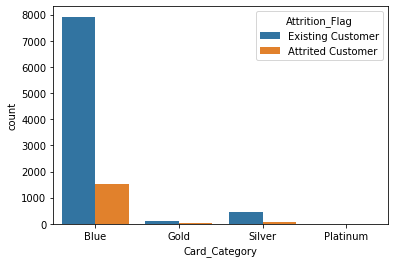

In [17]:
print(ccdata['Card_Category'][ccdata['Attrition_Flag']=='Attrited Customer'].value_counts())
sns.countplot(data=ccdata, x='Card_Category',hue='Attrition_Flag')

In [18]:
ccdata[(ccdata['Total_Trans_Amt'] > 10583) & (ccdata['Attrition_Flag'] == 'Attrited Customer')].count()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

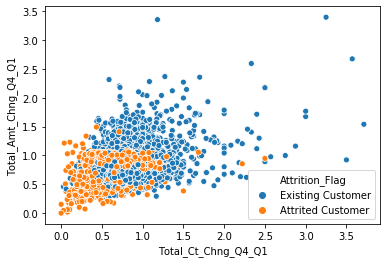

In [19]:
sns.scatterplot(x='Total_Ct_Chng_Q4_Q1',y='Total_Amt_Chng_Q4_Q1',data=ccdata,hue='Attrition_Flag')
#the bulk of attrited customers gradually reduce the number of total transactions and amount spent using the bank's credit
#card as the year progressed on

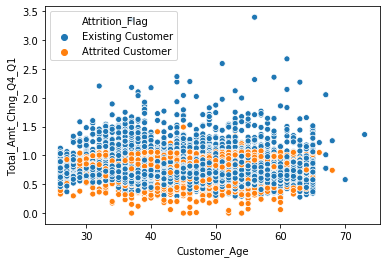

In [20]:
sns.scatterplot(x='Customer_Age',y='Total_Amt_Chng_Q4_Q1',data=ccdata,hue='Attrition_Flag')

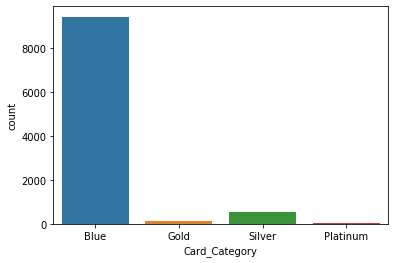

In [22]:
sns.countplot(x='Card_Category',data=ccdata)